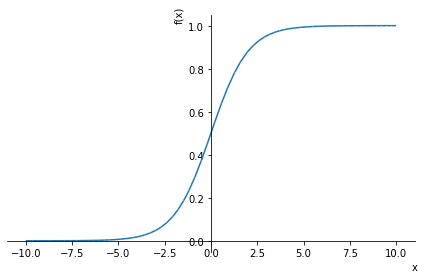

In [ ]:
# To plot functions of symbolic variables like f(x), we need a package called sympy
from sympy import symbols
from sympy.plotting import plot as splot
from sympy.functions import exp
from sympy.abc import x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

splot(    1 / ( 1 + exp( -x ) )   )

# **Pre-Processing**

In [ ]:
#loading the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/BA305- Team Project/breast-cancer.csv')
df_save=df

Mounted at /content/drive


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# transform diagnosis into a binary categorical variable
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [ ]:
# Store the outcome as #y
y=df['diagnosis']

In [ ]:
# remove the 'ID' and 'Diagnosis' columns
drop_col=['id','diagnosis']
df=df.drop(drop_col,axis=1)

In [ ]:
df_se_col=df.filter(regex='_se').columns
df_mean_col=df.filter(regex='_mean').columns
df_worst_col=df.filter(regex='_worst').columns

In [ ]:
# Store dataset with 'Mean and Worst columns' as 'df_se'
df_se=df.drop(df_mean_col, axis=1)
df_se=df_se.drop(df_worst_col, axis=1)
df_meanworst=df.drop(df_se,axis=1)

In [ ]:
# Store dataset with 'Mean columns' as 'df_mean'
df_mean=df.drop(df_se_col, axis=1)
df_mean=df_mean.drop(df_worst_col, axis=1)

In [ ]:
# Store dataset with 'Worst columns' as 'df_worst'
df_worst=df.drop(df_se_col, axis=1)
df_worst=df_worst.drop(df_mean_col, axis=1)

In [ ]:
df_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


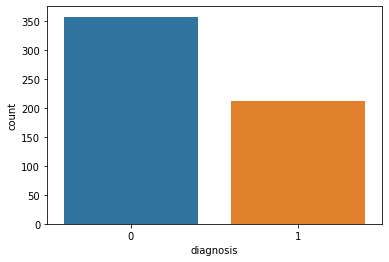

In [ ]:
#check the distribution of y values
sns.countplot(y)

In [ ]:
# Split data, stratify on
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split( df_mean, y, test_size = 0.4, random_state = 1, stratify = y)
print( "Number of 1's in training set:", sum(y_train_m))
print( "Number of 1's in testing set:", sum(y_test_m))
print( "Proportion of 1's in testing set", sum(y_test_m)/(sum(y_train_m)+sum(y_test_m)))

Number of 1's in training set: 127
Number of 1's in testing set: 85
Proportion of 1's in testing set 0.4009433962264151


In [ ]:
## Visualization


# **Logistic Regression with 'Mean' Columns**



In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_m, y_train_m)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Run class y predictions
y_pred_m = lr.predict(X_test_m)

In [ ]:
# Confusion Matrix
confusion_matrix(y_test_m,y_pred_m)

array([[135,   8],
       [ 17,  68]])

In [ ]:
# accuracy score
accuracy_score(y_test_m, y_pred_m)

0.8903508771929824

In [ ]:
# Extract regressed probabilities using predict_proba
p_pred_m=lr.predict_proba(X_test_m)[:,1]
np.round(p_pred_m,3)

array([0.012, 0.   , 0.973, 0.926, 0.961, 1.   , 0.856, 0.112, 0.   ,
       0.01 , 0.357, 0.001, 0.007, 0.066, 0.002, 0.   , 0.002, 0.662,
       0.007, 0.004, 0.95 , 0.037, 0.002, 0.006, 0.06 , 0.863, 0.121,
       0.747, 0.006, 1.   , 1.   , 0.123, 0.   , 0.968, 0.997, 0.025,
       0.008, 0.004, 0.006, 0.007, 0.975, 0.006, 0.995, 0.198, 0.452,
       0.999, 0.993, 0.   , 0.047, 0.033, 0.002, 0.046, 0.008, 0.001,
       0.836, 1.   , 0.434, 0.015, 0.931, 0.998, 0.721, 0.001, 0.999,
       0.004, 0.   , 0.317, 0.045, 0.445, 0.893, 0.041, 0.69 , 0.044,
       0.315, 0.997, 0.123, 0.146, 0.22 , 0.976, 0.748, 0.003, 0.998,
       0.   , 0.051, 0.035, 1.   , 0.005, 0.812, 0.001, 0.01 , 1.   ,
       0.001, 0.006, 0.152, 0.135, 0.001, 0.175, 0.941, 0.   , 0.931,
       1.   , 0.344, 0.986, 0.027, 0.972, 0.972, 0.556, 1.   , 0.076,
       0.04 , 0.926, 0.023, 0.335, 0.05 , 0.016, 0.003, 0.013, 0.001,
       0.046, 0.006, 0.604, 0.   , 0.013, 0.001, 0.035, 0.001, 0.842,
       0.091, 0.107,

Accuracy score list [0.8464912280701754, 0.8859649122807017, 0.9078947368421053, 0.9035087719298246, 0.9035087719298246, 0.9078947368421053, 0.9122807017543859, 0.8947368421052632, 0.8903508771929824, 0.8903508771929824, 0.8903508771929824, 0.8903508771929824, 0.8947368421052632, 0.8859649122807017, 0.881578947368421]
Best cutoff point is 0.4 ; corresponding accuracy score is  0.9122807017543859


Text(0, 0.5, 'Accuracy score')

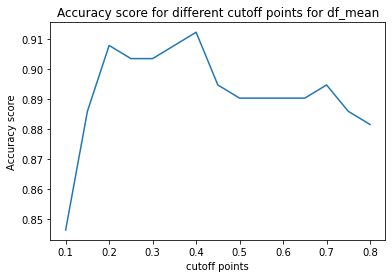

In [ ]:
#test cutoff
cutoff_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
accuracy_score_list=[0]*len(cutoff_list)
best_cutoff=0
for i in range(len(cutoff_list)):
  y_pred_new=[1 if j > cutoff_list[i] else 0 for j in p_pred_m]
  accuracy_score_temp=accuracy_score(y_test_m, y_pred_new)
  accuracy_score_list[i]=accuracy_score_temp
  if accuracy_score_list[i]>accuracy_score_list[best_cutoff]:
    best_cutoff=i
    best_y_pred=y_pred_new

print("Accuracy score list", accuracy_score_list)
print("Best cutoff point is", cutoff_list[best_cutoff],"; corresponding accuracy score is ", accuracy_score_list[best_cutoff])
plt.plot(cutoff_list,accuracy_score_list)
plt.title("Accuracy score for different cutoff points for df_mean")
plt.xlabel("cutoff points")
plt.ylabel('Accuracy score')


In [ ]:
confusion_matrix(y_test_m,best_y_pred)

array([[134,   9],
       [ 11,  74]])

In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=df_mean.columns))
df_mean
lr_coef

intercept  -28.931411146578615
                           coeff
radius_mean            -1.876250
texture_mean            0.216639
perimeter_mean          0.636136
area_mean              -0.013272
smoothness_mean         0.302705
compactness_mean        0.488995
concavity_mean          0.882474
concave points_mean     0.468681
symmetry_mean           0.372261
fractal_dimension_mean  0.081049


array([-1.87625001,  0.21663918,  0.63613603, -0.01327248,  0.30270495,
        0.48899535,  0.88247412,  0.46868122,  0.37226069,  0.08104869])

In [ ]:
# print exponentiated Experience and Training coefficients
for i in range(len(lr_coef)):
 print( math.exp(lr_coef[i]) )

0.1531633920905471
1.2418959144812247
1.889167073812048
0.9868152117924371
1.353515045017472
1.6306771328759202
2.416871946811811
1.5978855477028415
1.4510112006469176
1.0844236935442313


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


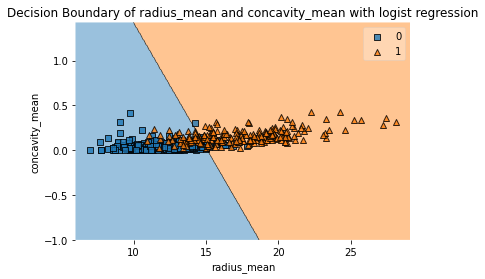

In [ ]:
#extract concavity_mean, radius_mean as two features and diagnosis as target as they have largest absolute value of coefficient
df_x=df_mean[ ['radius_mean','concavity_mean']]
df_y=df_save['diagnosis']
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=LogisticRegression().fit(df_x, df_y))
plt.xlabel("radius_mean")
plt.ylabel('concavity_mean')
plt.title('Decision Boundary of radius_mean and concavity_mean with logist regression')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


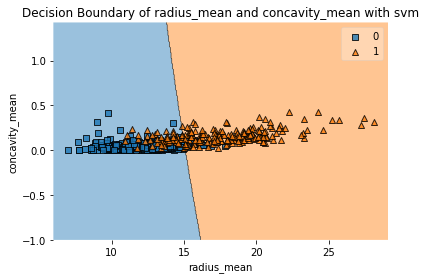

In [ ]:
 from sklearn import svm
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=svm.SVC(kernel='poly').fit(df_x,df_y))
plt.xlabel("radius_mean")
plt.ylabel('concavity_mean')
plt.title('Decision Boundary of radius_mean and concavity_mean with svm')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


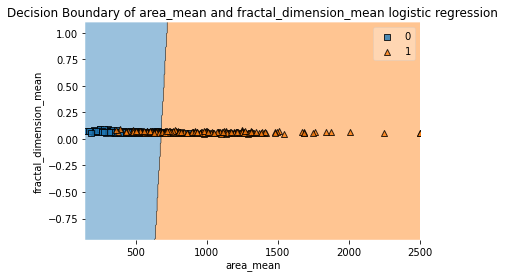

In [ ]:
#extract concavity_mean, radius_mean as two features and diagnosis as target as they have smallest absolute value of coefficient
df_x=df_mean[ ['area_mean','fractal_dimension_mean']]
df_y=df_save['diagnosis']
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=LogisticRegression().fit(df_x, df_y))
plt.xlabel("area_mean")
plt.ylabel('fractal_dimension_mean')
plt.title('Decision Boundary of area_mean and fractal_dimension_mean logistic regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


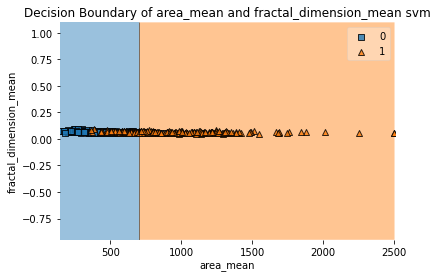

In [ ]:
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=svm.SVC(kernel='poly').fit(df_x,df_y))
plt.xlabel("area_mean")
plt.ylabel('fractal_dimension_mean')
plt.title('Decision Boundary of area_mean and fractal_dimension_mean svm')
plt.show()

# **Logistic Regression with 'Worst' Columns**





In [ ]:
# Split data, stratify on
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split( df_worst, y, test_size = 0.4, random_state = 1, stratify = y)
print( "Number of 1's in training set:", sum(y_train_w))
print( "Number of 1's in testing set:", sum(y_test_w))
print( "Proportion of 1's in testing set", sum(y_test_w)/(sum(y_train_w)+sum(y_test_w)))
# Logistic Regression
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_w, y_train_w)

Number of 1's in training set: 127
Number of 1's in testing set: 85
Proportion of 1's in testing set 0.4009433962264151


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=300)

Confusion Matrix with defult cutoff point:
[[138   5]
 [  8  77]]
Accuracy scoure with defult cutoff point: 0.9429824561403509
Accuracy score list [0.8991228070175439, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9517543859649122, 0.9473684210526315, 0.9473684210526315, 0.9429824561403509, 0.9429824561403509, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9342105263157895, 0.9298245614035088, 0.9342105263157895]
Best cutoff point is 0.3 ; corresponding accuracy score is  0.9517543859649122
Confusion Matrix with best cutoff point:
[[137   6]
 [  5  80]]


Text(0, 0.5, 'Accuracy score')

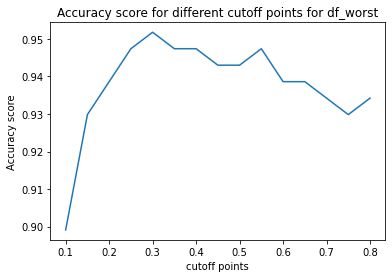

In [ ]:
# Run class y predictions
y_pred_w = lr.predict(X_test_w)
# Confusion Matrix
print("Confusion Matrix with defult cutoff point:")
print(confusion_matrix(y_test_w,y_pred_w))
# accuracy score
print("Accuracy scoure with defult cutoff point:",accuracy_score(y_test_w, y_pred_w))
# What if we want to change the default probability cutoff of 0.5?

# Extract regressed probabilities using predict_proba
p_pred_w=lr.predict_proba(X_test_w)[:,1]
np.round(p_pred_w,3)
#test cutoff
cutoff_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
accuracy_score_list=[0]*len(cutoff_list)
best_cutoff=0
for i in range(len(cutoff_list)):
  y_pred_new=[1 if j > cutoff_list[i] else 0 for j in p_pred_w]
  accuracy_score_temp=accuracy_score(y_test_w, y_pred_new)
  accuracy_score_list[i]=accuracy_score_temp
  if accuracy_score_list[i]>accuracy_score_list[best_cutoff]:
    best_cutoff=i
    best_y_pred=y_pred_new

print("Accuracy score list", accuracy_score_list)
print("Best cutoff point is", cutoff_list[best_cutoff],"; corresponding accuracy score is ", accuracy_score_list[best_cutoff])
print("Confusion Matrix with best cutoff point:")
print(confusion_matrix(y_test_w,best_y_pred))
plt.plot(cutoff_list,accuracy_score_list)
plt.title("Accuracy score for different cutoff points for df_worst")
plt.xlabel("cutoff points")
plt.ylabel('Accuracy score')

In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=df_worst.columns))
lr_coef

intercept  -26.616969375155954
                            coeff
radius_worst             0.330969
texture_worst            0.197833
perimeter_worst          0.109222
area_worst               0.003072
smoothness_worst         0.436781
compactness_worst        1.123700
concavity_worst          1.766756
concave points_worst     0.664329
symmetry_worst           1.040350
fractal_dimension_worst  0.181512


array([0.330969  , 0.19783346, 0.10922221, 0.00307228, 0.4367812 ,
       1.12369988, 1.76675622, 0.66432896, 1.0403502 , 0.18151238])

In [ ]:
# print exponentiated Experience and Training coefficients
for i in range(len(lr_coef)):
 print( math.exp(lr_coef[i]) )

1.3923166297344707
1.2187594047416648
1.1154101805628371
1.0030770027925275
1.5477173962789519
3.0762148087191417
5.851840462274049
1.9431861297770363
2.8302079789999994
1.1990293819178621


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


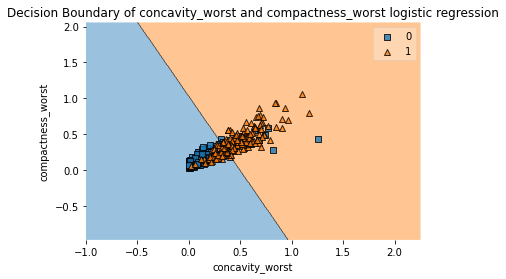

In [ ]:
#extract concavity_worst, radius_mean as two features and diagnosis as target as they have largest absolute value of coefficient with logistic regression
df_x=df_worst[ ['concavity_worst','compactness_worst']]
df_y=df_save['diagnosis']
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=LogisticRegression().fit(df_x, df_y))
plt.xlabel("concavity_worst")
plt.ylabel('compactness_worst')
plt.title('Decision Boundary of concavity_worst and compactness_worst logistic regression')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


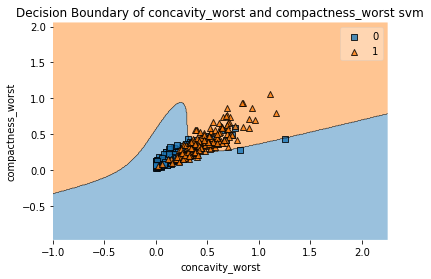

In [ ]:
#fit data with support vector machine with polynomial kernel
from sklearn import svm
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=svm.SVC(kernel='poly').fit(df_x,df_y))
plt.xlabel("concavity_worst")
plt.ylabel('compactness_worst')
plt.title('Decision Boundary of concavity_worst and compactness_worst svm')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


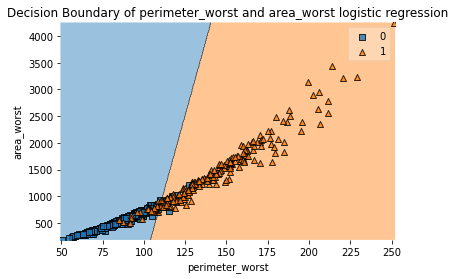

In [ ]:
#extract perimeter_worst, area_worst as two features and diagnosis as target as they have smallest absolute value of coefficient with logistic regression
df_x=df_worst[ ['perimeter_worst','area_worst']]
df_y=df_save['diagnosis']
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=LogisticRegression().fit(df_x, df_y))
plt.xlabel("perimeter_worst")
plt.ylabel('area_worst')
plt.title('Decision Boundary of perimeter_worst and area_worst logistic regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


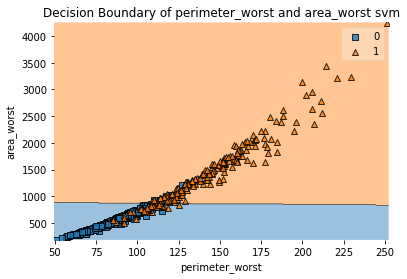

In [ ]:
#fit data with support vector machine with polynomial kernel
plot_decision_regions(df_x.to_numpy(), df_y.to_numpy(),clf=svm.SVC(kernel='poly').fit(df_x,df_y))
plt.xlabel("perimeter_worst")
plt.ylabel('area_worst')
plt.title('Decision Boundary of perimeter_worst and area_worst svm')
plt.show()